In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

### 1차원 분포 플롯 
- 데이터의 분포를 확인하기 위해서 산점도(scatter)를 사용한다
- 산점도는 x축과 y축이 지정되어야 하기 때문에 1차원 데이터는 표현할 수 없다
- 이에 seaborn에서 1차원 데이터의 분포를 볼 수 있는 것을 제공

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [3]:
iris.columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
iris

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<function matplotlib.pyplot.show(close=None, block=None)>

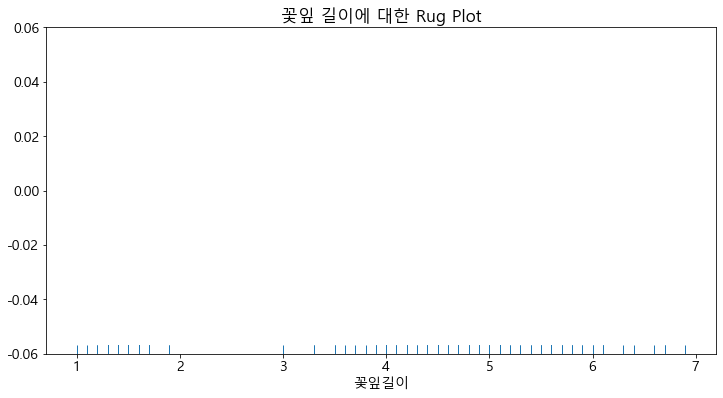

In [4]:
# Rug Plot
# 1차원 데이터에 저장되어 있는 값들의 종류를 확인할 수 있다
# 각 값들이 얼마나 저장되어 있는지 확인할 수는 없다
sns.rugplot(iris['꽃잎길이'])
plt.title('꽃잎 길이에 대한 Rug Plot')
plt.show

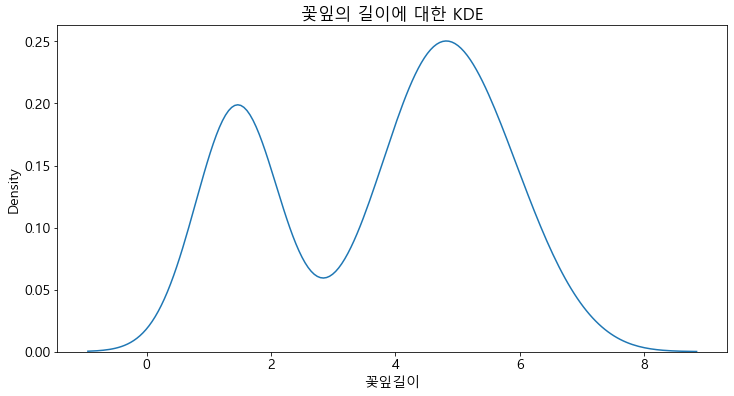

In [5]:
# kde : 커널 함수를 이용해 밀도를 표현
# histogram을 통해 구간별 값의 갯수를 파악할 수 있다. histogram은 막대 그래프로 표현하지만
# kde는 선 그래프로 각 값의 갯수를 파악할 수 있다
sns.kdeplot(iris['꽃잎길이'])
plt.title('꽃잎의 길이에 대한 KDE')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


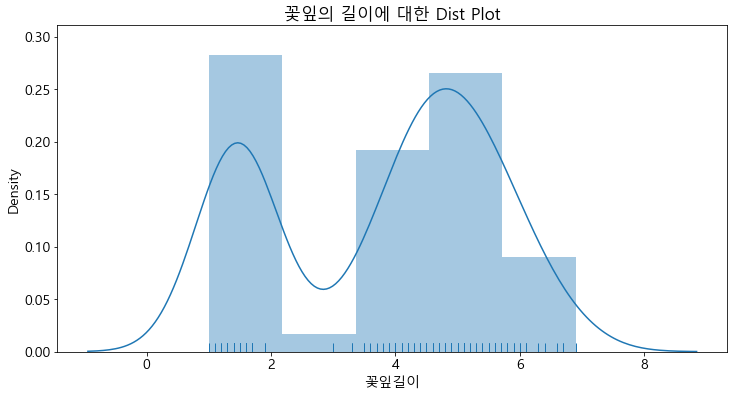

In [6]:
# distplot : 러그와 커널 밀도를 같이 표현하는 함수
sns.distplot(iris['꽃잎길이'], kde=True, rug=True)
plt.title('꽃잎의 길이에 대한 Dist Plot')
plt.show()

### 카운트 플롯
- 특정 column의 데이터의 갯수를 막대 그래프로 표현한 그래프
- 지정된 column의 데이터의 각 종류별로 몇 개씩 저장되어 있는지 확인할 수 있는 그래프
- 간단하게 그릴 수 있다는 장점이 있고 matplotlib이나 DataFrame을 통해 그래프를 그릴 때 오류가 생기는 부분을 해결한 그래프 

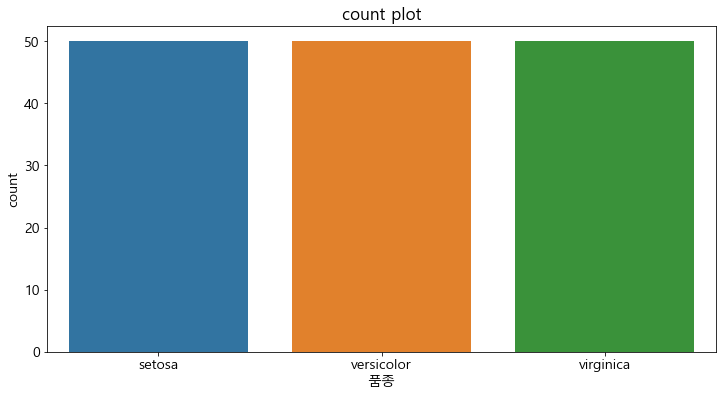

In [7]:
sns.countplot(data=iris, x='품종')
plt.title('count plot')
plt.show()

### 다차원 데이터
- 데이터 변수가 여러 개인 다차원 데이터를 표현할 수 있다
- 분석하고자 하는 데이터가 모두 범위 값인 경우
- 분석하고자 하는 데이터가 모두 카테고리 값인 경우
- 분석하고자 하는 데이터가 모두 범위형과 카테고리형이 섞여 있는 경우

### 2차원 실수형 데이터

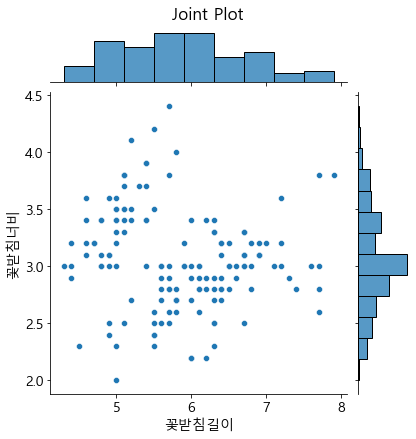

In [11]:
# jointplot : 산점도와 히스토그램 같이 표현
sns.jointplot(x='꽃받침길이', y='꽃받침너비', data=iris)
plt.suptitle('Joint Plot', y=1.02)
plt.show()

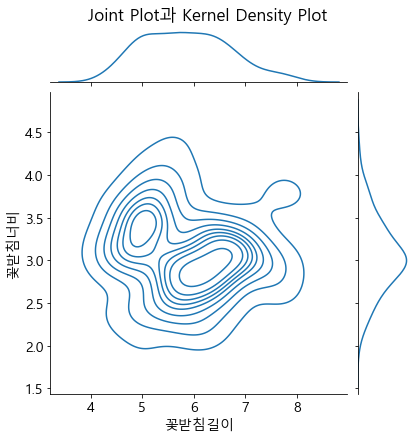

In [10]:
# kind에 kde를 넣어주면 kde 커널 밀도 히스토그램을 그릴 수 있다
sns.jointplot(x='꽃받침길이', y='꽃받침너비', data=iris, kind='kde')
plt.suptitle('Joint Plot과 Kernel Density Plot', y=1.02)
plt.show()

### Pair Plot
- 산점도의 경우에는 2차원 데이터, 즉 column 두 개를 지정하여 표현한다
- 만약 DataFrame의 column이 다 수인 경우 산점도를 그리려면 개발자가 꽤 많은 그래프를 그려야 한다. 
- Pair Plot은 DataFrame의 각 column들을 조합한 산점도를 모두 표현해준다
- 여기에 히스토그램도 같이 표현해 준다

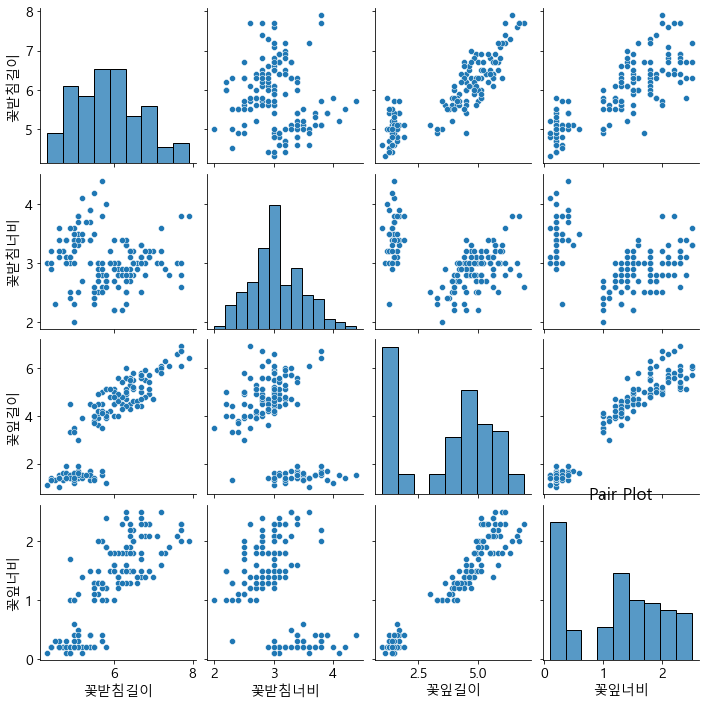

In [12]:
sns.pairplot(iris)
plt.title('Pair Plot')
plt.show()

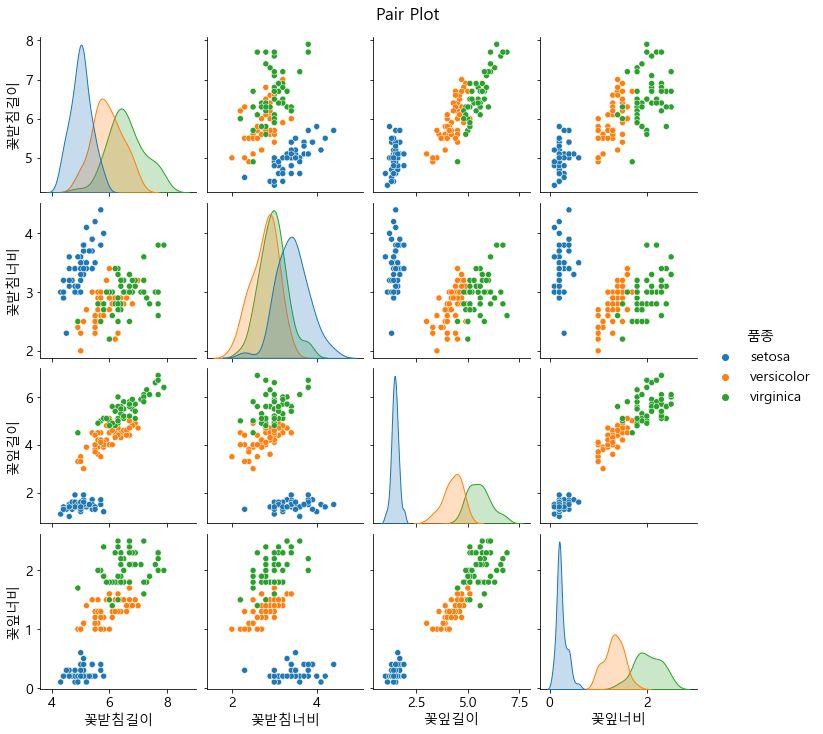

In [14]:
# hue : 결과 데이터에 해당하는 column을 지정
# 지정된 column의 값이 똑같은 것 끼리 같은 색으로 표시 
sns.pairplot(iris, hue='품종')
plt.suptitle('Pair Plot', y=1.02)
plt.show()

### Heatmap
- column간의 상관관계나 데이터의 양을 색상으로 표현해 확인하는 그래프

In [15]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [18]:
# pivot table 
# column 하나를 x축, 또 하나를 y축으로 지정하여 3번째로 지정된 것을 값으로 하는 table
flights_passenger = flights.pivot('month', 'year', 'passengers')
flights_passenger

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


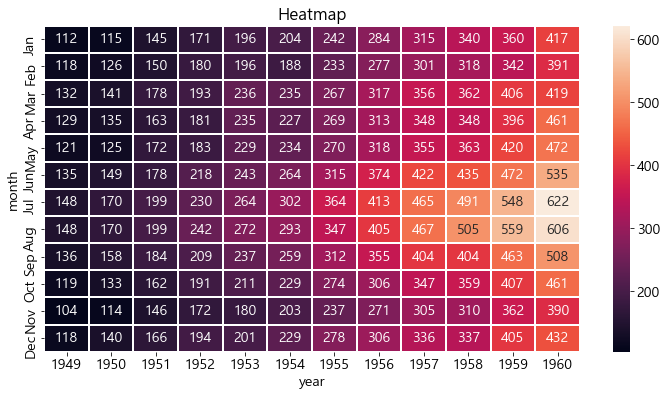

In [19]:
# heatmap을 그린다
sns.heatmap(flights_passenger, annot=True, fmt="d", linewidths=1)
plt.title('Heatmap')
plt.show()

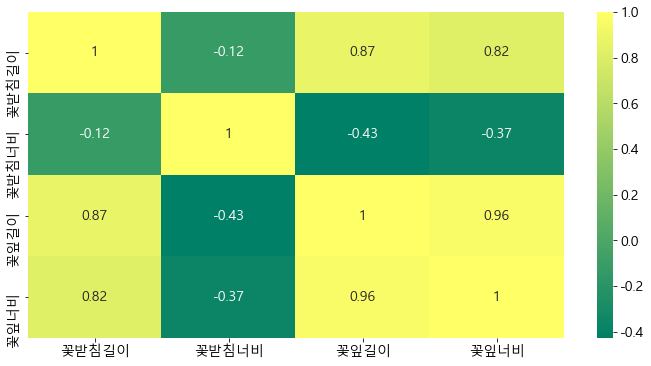

In [23]:
# 상관관계를 heatmap으로 표현
iris.corr()
# https://seaborn.pydata.org/tutorial/color_palettes.html
# cmap : 색상 팔레트
sns.heatmap(iris.corr(), annot=True, cmap='summer')
plt.show()